In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [229]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.shape

(13320, 9)

In [230]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [231]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [232]:
df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns', inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [233]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [234]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [235]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [236]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.drop(['size'], axis='columns', inplace=True)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [237]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [238]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False
    
df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [239]:
def convert_sqft_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None
    
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_range_to_num)
df.dropna(inplace=True)

In [240]:
df['price_per_sqft'] = (df['price'] * 1e5) / df['total_sqft']
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [241]:
len(df['location'].unique())

1298

In [242]:
df['location'] = df['location'].apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [243]:
len(location_stats[location_stats <= 10])

1047

In [244]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats[location_stats <= 10] else x)
len(df['location'].unique())

241

In [245]:
df[df['total_sqft'] / df['bhk'] < 300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [246]:
df.shape

(13200, 6)

In [247]:
df.drop(df[df['total_sqft'] / df['bhk'] < 300].index, axis='index', inplace=True)
df.shape

(12456, 6)

In [248]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [249]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = subdf['price_per_sqft'].mean()
        std = subdf['price_per_sqft'].std()
        reduced_df = subdf[(subdf['price_per_sqft'] > (mean - std)) & (subdf['price_per_sqft'] < (mean + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(10293, 6)

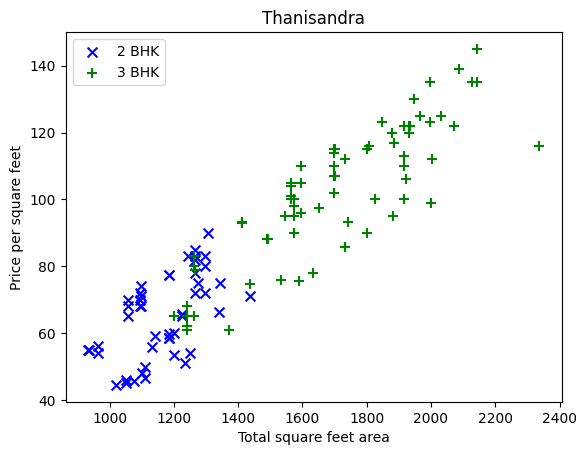

In [250]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50, marker='x')
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='green', label='3 BHK', s=50, marker='+')
    plt.xlabel('Total square feet area')
    plt.ylabel('Price per square feet')
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df, 'Thanisandra')

In [251]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7365, 6)

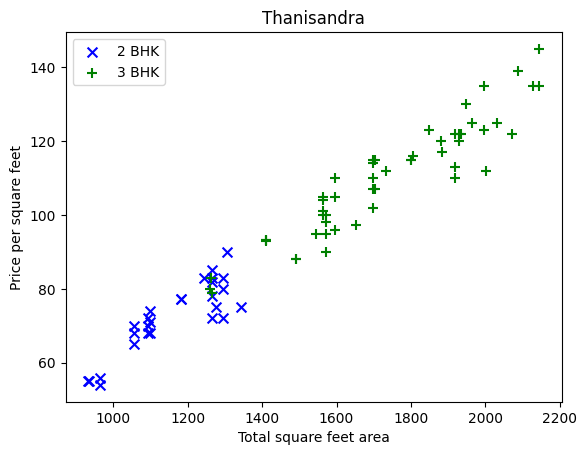

In [252]:
plot_scatter_chart(df, 'Thanisandra')

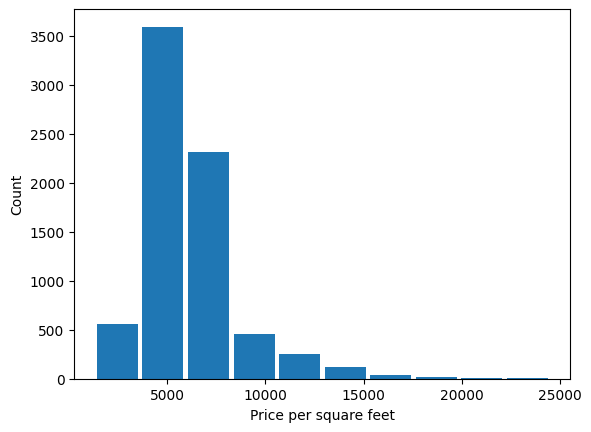

In [253]:
plt.hist(df['price_per_sqft'], rwidth=0.9)
plt.xlabel('Price per square feet')
plt.ylabel('Count')
plt.show()

In [254]:
df['price_per_sqft'].describe()

count     7365.000000
mean      6135.300111
std       2424.628926
min       1300.000000
25%       4595.060310
50%       5684.210526
75%       6904.109589
max      24509.803922
Name: price_per_sqft, dtype: float64

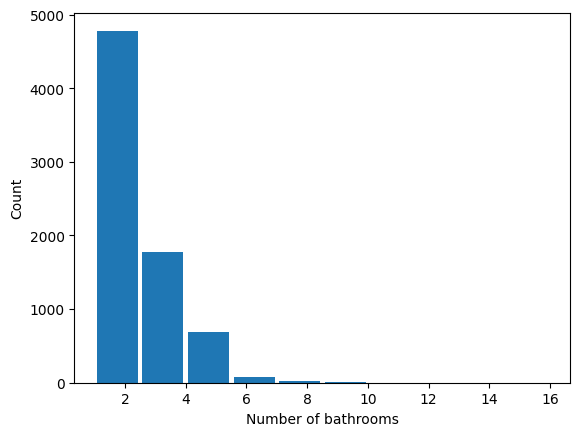

In [255]:
plt.hist(df['bath'], rwidth=0.9)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

In [256]:
df[df['bath'] > df['bhk'] + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5273,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6756,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8458,other,11338.0,9.0,1000.0,6,8819.897689


In [257]:
df.drop(df[df['bath'] > df['bhk'] + 2].index, axis='index', inplace=True)
df.shape

(7361, 6)

In [258]:
df.drop('price_per_sqft', axis='columns', inplace=True)
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [259]:
df.describe()

,total_sqft,bath,price,bhk
count,7361.000000,7361.000000,7361.000000,7361.000000
mean,1491.831441,2.451297,98.887531,2.500204
std,849.318895,1.009385,92.614943,0.926237
min,300.000000,1.000000,10.000000,1.000000
25%,1096.000000,2.000000,50.000000,2.000000
50%,1260.000000,2.000000,73.200000,2.000000
75%,1680.000000,3.000000,112.000000,3.000000
max,30000.000000,16.000000,2200.000000,16.000000


In [260]:
sqft_upper = df['total_sqft'].mean() + 3 * df['total_sqft'].std()
sqft_lower = df['total_sqft'].mean() - 3 * df['total_sqft'].std()
bath_upper = df['bath'].mean() + 3 * df['bath'].std()
bath_lower = df['bath'].mean() - 3 * df['bath'].std()
price_upper = df['price'].mean() + 3 * df['price'].std()
price_lower = df['price'].mean() - 3 * df['price'].std()
bhk_upper = df['bhk'].mean() + 3 * df['bhk'].std()
bhk_lower = df['bhk'].mean() - 3 * df['bhk'].std()

sqft_outliers = df[(df['total_sqft'] > sqft_upper) | (df['total_sqft'] < sqft_lower)]
bath_outliers = df[(df['bath'] > bath_upper) | (df['bath'] < bath_lower)]
price_outliers = df[(df['price'] > price_upper) | (df['price'] < price_lower)]
bhk_outliers = df[(df['bhk'] > bhk_upper) | (df['bhk'] < bhk_lower)]

outliers = pd.concat([sqft_outliers, bath_outliers, price_outliers, bhk_outliers])
outliers.drop_duplicates(inplace=True)

df.drop(outliers.index, axis='index', inplace=True)

outliers.shape, df.shape

((267, 5), (7094, 5))

In [261]:
dummies = pd.get_dummies(df['location'])

df = pd.concat([df, dummies], axis='columns')
df.drop(['location', 'other'], axis='columns', inplace=True)

df.shape

(7094, 243)

In [262]:
df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2450.0,4.0,368.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [263]:
X = df.drop('price', axis='columns')
y = df['price']

In [272]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [273]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.8412569107909654

In [266]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84125691, 0.87982972, 0.86024415, 0.85785411, 0.87266302])

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

algos = {
    'Linear': {
        'model': LinearRegression(),
        'params': {}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1e-3, 1e-2, 1e-1, 1, 2, 3],
            'selection': ['cyclic', 'random']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter': ['best', 'random'],
        }
    }
}

scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for mn, mp in algos.items():
    gscv = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    gscv.fit(X, y)

    scores.append({
        'Model': mn,
        'Best Params': gscv.best_params_,
        'Best Score': gscv.best_score_
    })
    
pd.DataFrame(scores, columns=['Model', 'Best Params', 'Best Score'])

,Model,Best Params,Best Score
0,Linear,{},0.862370
1,Lasso,"{'alpha': 0.001, 'selection': 'cyclic'}",0.862351
2,Decision Tree,"{'criterion': 'poisson', 'splitter': 'best'}",0.747040


In [290]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[loc_index] = True

    return lin_reg.predict([x])[0]

In [292]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

82.98285614619115

In [293]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

86.12260134952335

In [296]:
predict_price('Indira Nagar', 1000, 2, 2), predict_price('Indira Nagar', 1000, 3, 3)

(133.63939795528182, 136.77914315861403)

In [297]:
import pickle

with open('home_prices_model.pickle', 'wb') as f:
    pickle.dump(lin_reg, f)

In [299]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))